In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
data["label_species"] = le.fit_transform(data["Species"])

In [10]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label_species
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


In [11]:
x = data.drop(columns = ["Species", "label_species"])
y = data["label_species"]

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [13]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression(multi_class = "multinomial")

In [16]:
model.fit(xtrain,ytrain)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [17]:
ypred = model.predict(xtest)
ypred

array([0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1,
       0, 2, 0, 1, 0, 2, 1, 0], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
cm = confusion_matrix(ytest, ypred)
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  6]], dtype=int64)

<AxesSubplot:>

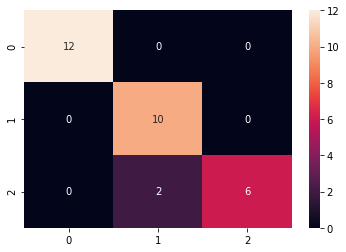

In [20]:
sns.heatmap(cm, annot = True)

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      1.00      0.91        10
           2       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30



In [24]:
acc = accuracy_score(ytest,ypred)
acc

0.9333333333333333

##### Focus on
   - feature_engineering
   - imbalanced_data_handling
   - tune_hyperparameters